In [1]:
import glob
#list_files=glob.glob('./recordings+7.14+Luc/*.txt')
#list_names0=[s.strip('recordings+7.14+Luc/\\.txt').replace('-','_') for s in list_files]
#list_names=[s.replace('./recordings+7.14+Luc\\','').replace('-','_').replace(')',')') for s in list_files]
list_files=glob.glob('./recordings+8.13/*.txt')
list_names0=[s.strip('recordings+8.13/\\.txt').replace('-','_') for s in list_files]
list_names=[s.replace('./recordings+8.13\\','').replace('-','_').replace(')',')') for s in list_files]

list_names[0:10]

['burpees_normal_speed_10_TM01L_1534060644190.txt',
 'burpees_normal_speed_10_TM01R_1534060644190.txt',
 'burpees_normal_speed_10_TM02L_1534060644190.txt',
 'burpees_normal_speed_10_TM02R_1534060644190.txt',
 'burpees_normal_speed_10_TM05L_1534060644190.txt',
 'burpees_normal_speed_10_TM05R_1534060644190.txt',
 'burpees_normal_speed_10_TM06L_1534060644190.txt',
 'burpees_normal_speed_10_TM06R_1534060644190.txt',
 'burpees_normal_speed_10_TM07L_1534060644190.txt',
 'burpees_normal_speed_10_TM07R_1534060644190.txt']

In [2]:
import pandas as pd
import re
def tabulate_data2(file):
    list_sensors=['gyroX','gyroY','gyroZ','lowAccelX','lowAccelY','lowAccelZ', 'highAccelX','highAccelY','highAccelZ']
    f = open(file,'rt')
    #remove_trackerName= [line.replace('T7L,', "").replace('T7R,',"").replace('T11R,','').replace('T11L,','') for line in f.readlines()]
    remove_trackerName=[(re.sub(r'(TM[0-9]+[A-Z],)', r'', line)) for line in f.readlines()]
    #[(re.sub(r'(h|N|!|N|1)', r"'\033[91m'\g<1>'\033[0m'", x)) for x in a]
    file_as_list= [[token.split(',') for token in line.split(';')] for line in remove_trackerName][0]
    file_as_list=sum([l for l in file_as_list], []) #flattens the nested list comprehension into one list
    chunks= [file_as_list[i:i+9] for i in range(0,len(file_as_list),9)]
    data=pd.DataFrame(chunks).apply(pd.to_numeric, errors='coerce')
    data.columns=list_sensors
    data['exercise']=list_names[list_files.index(file)]
    return data

In [3]:
data2=pd.concat([tabulate_data2(file) for file in list_files])
data2.tail()
data2.to_csv('data2.csv',index=False)

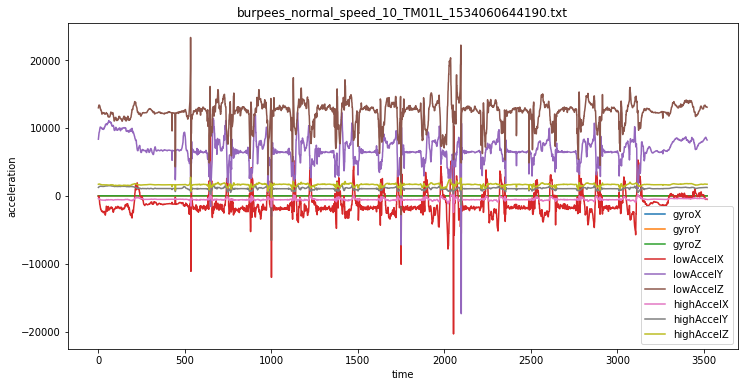

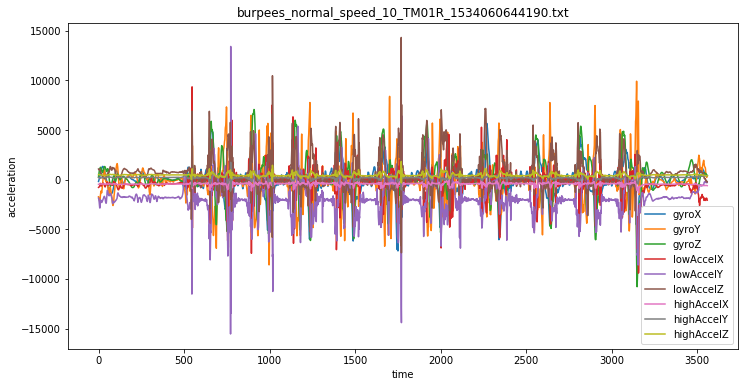

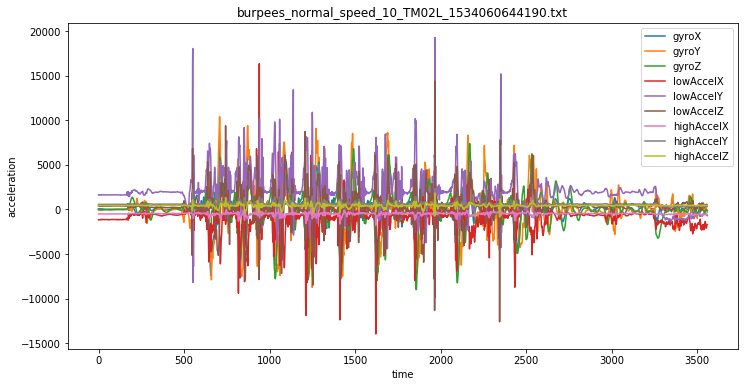

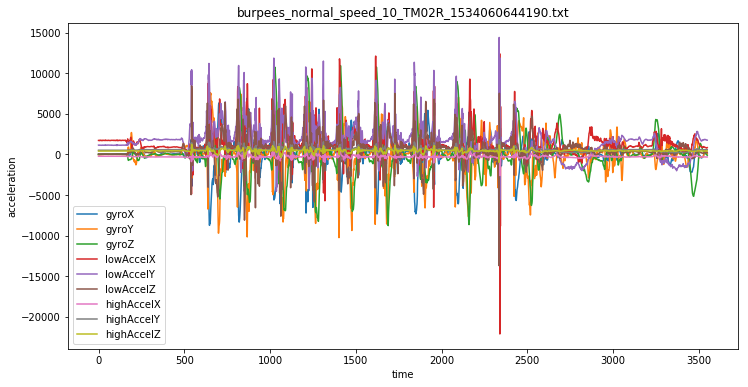

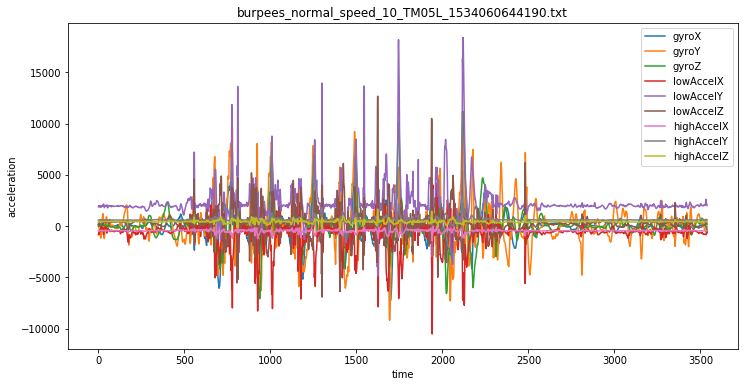

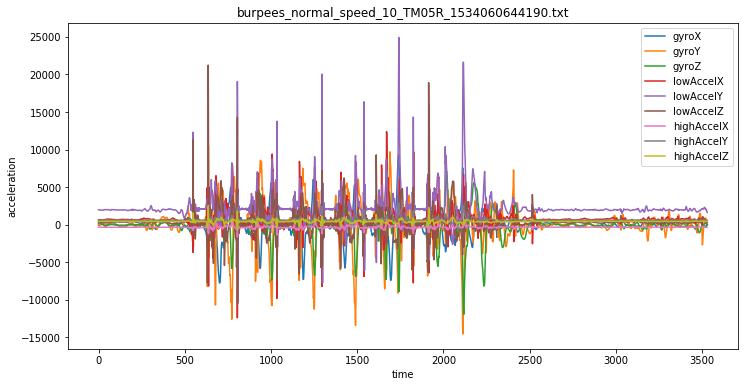

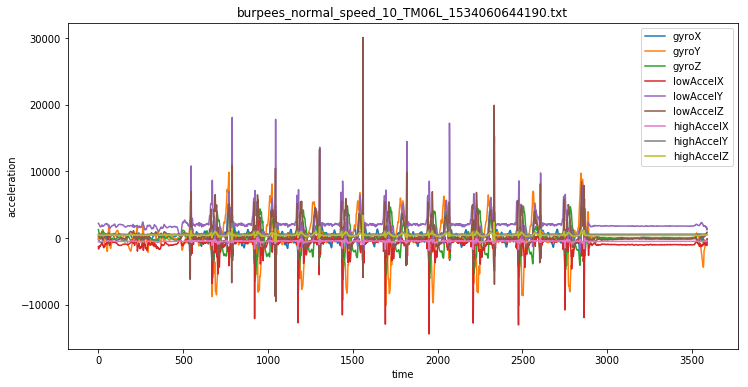

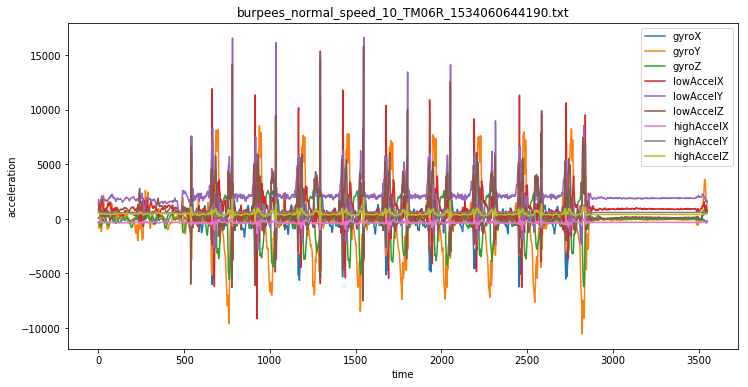

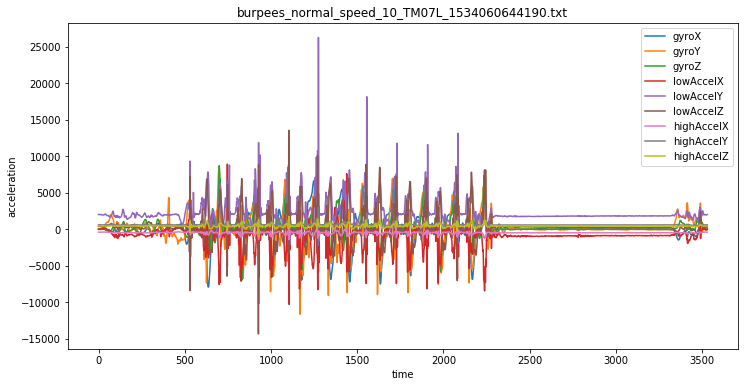

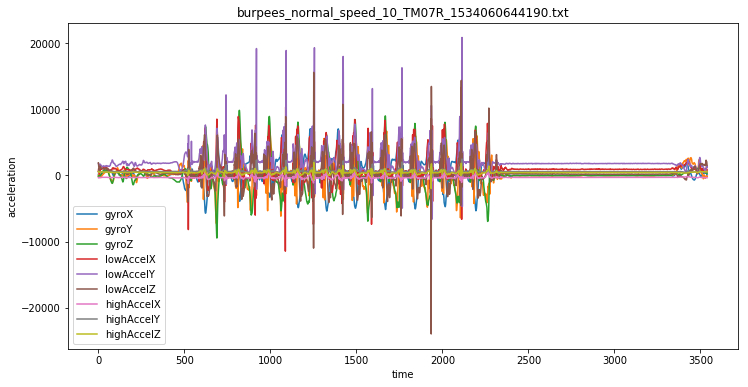

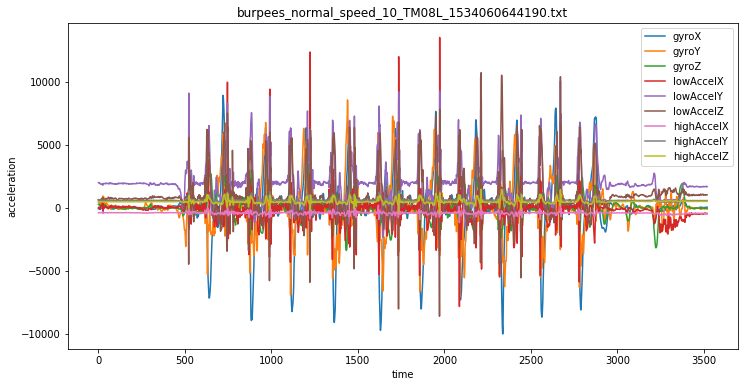

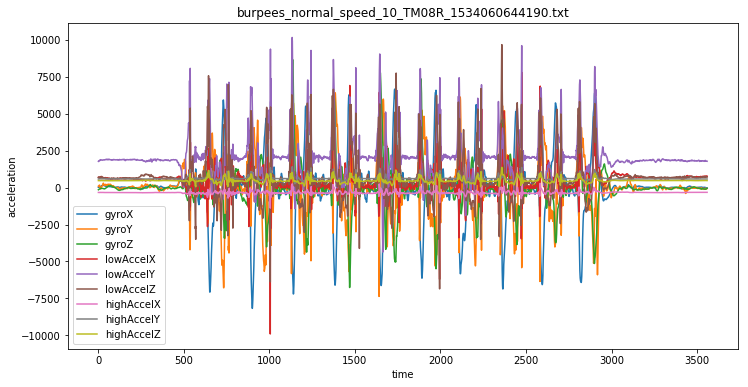

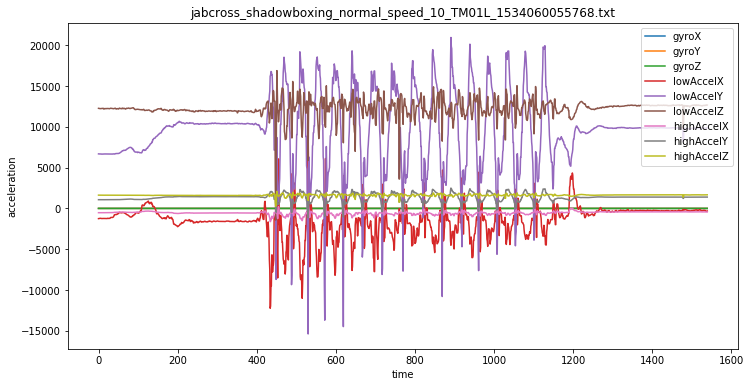

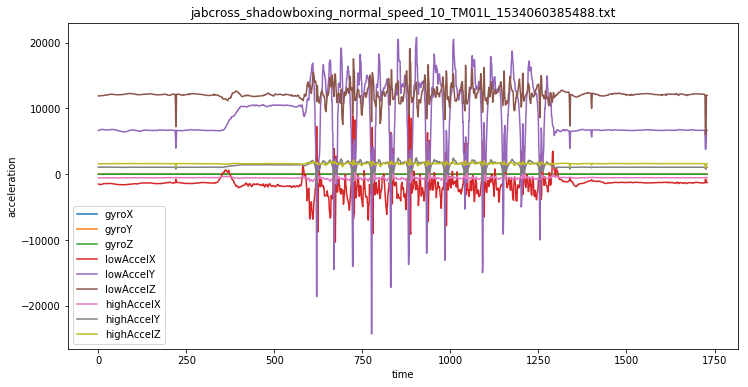

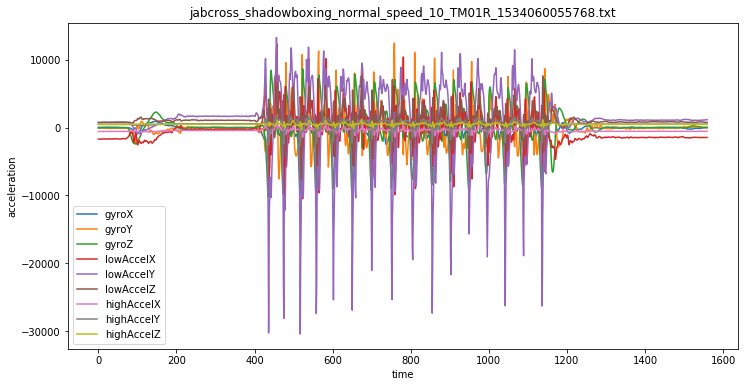

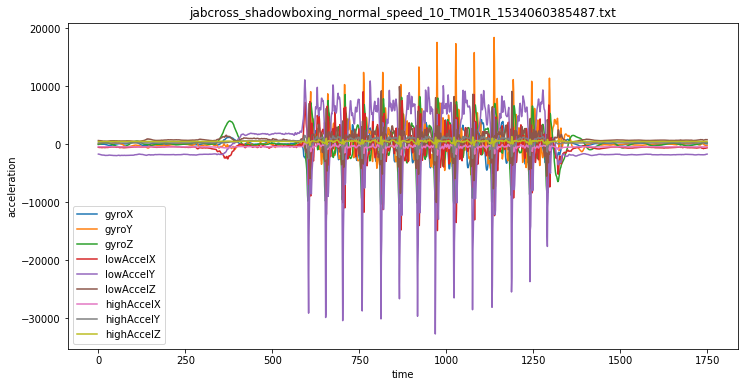

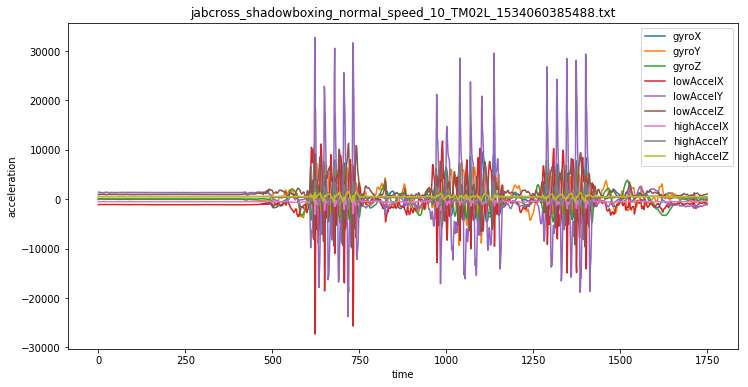

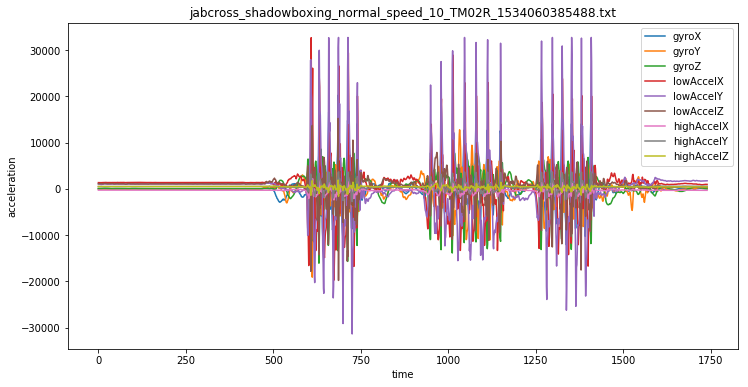

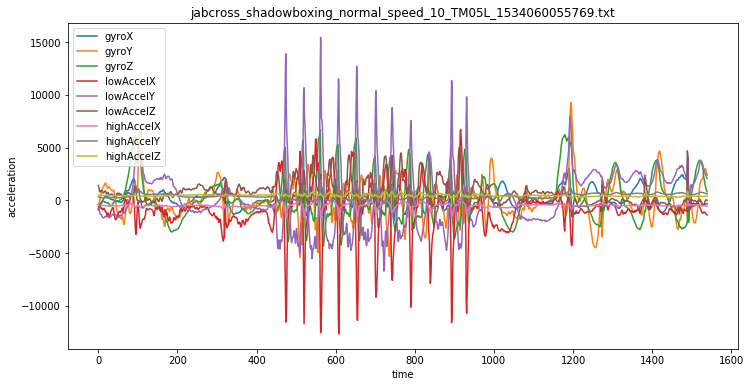

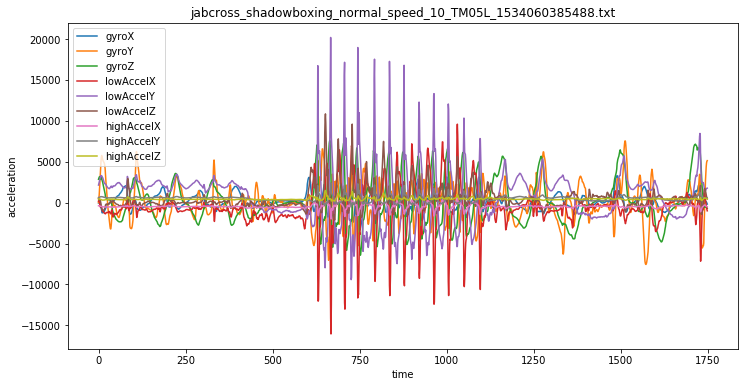

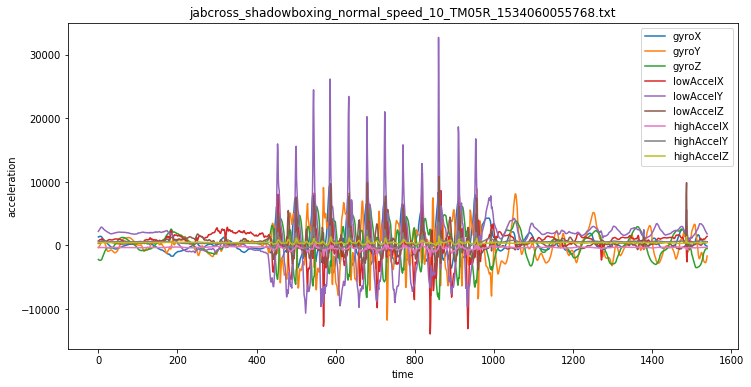

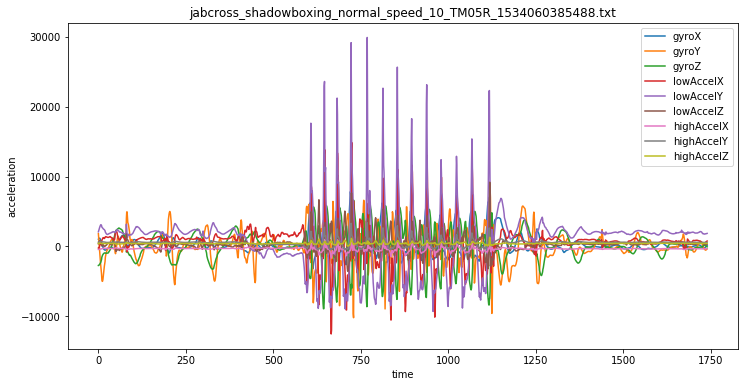

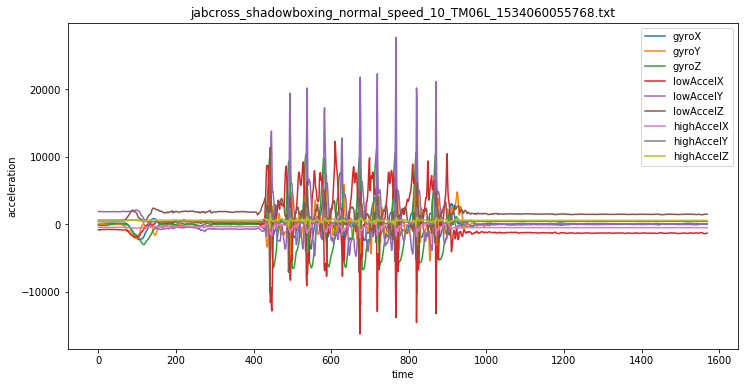

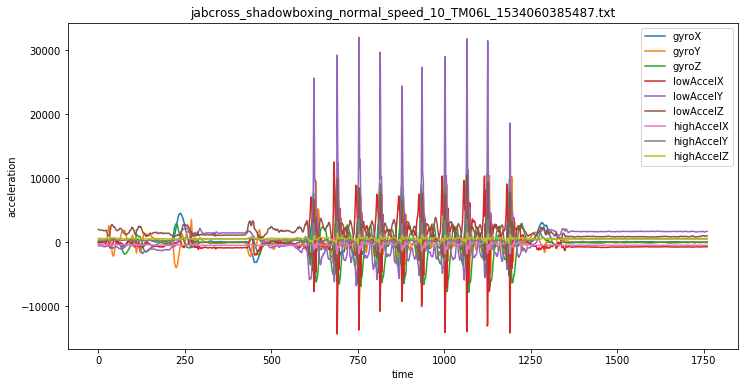

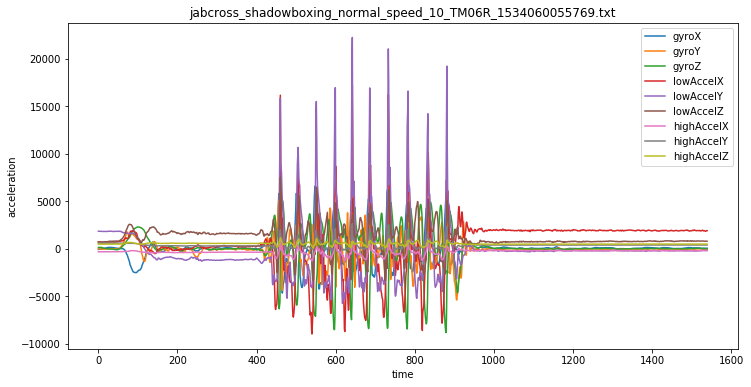

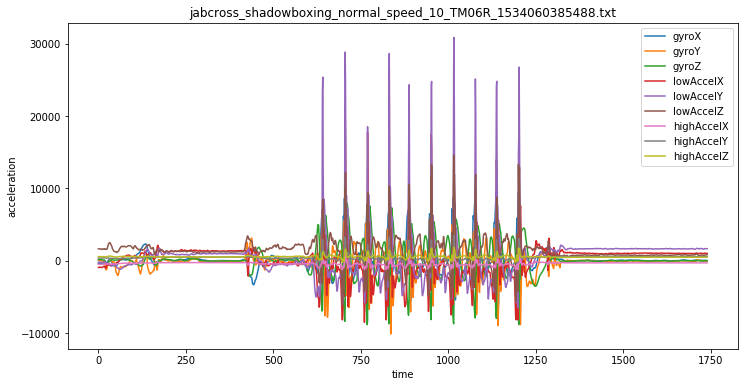

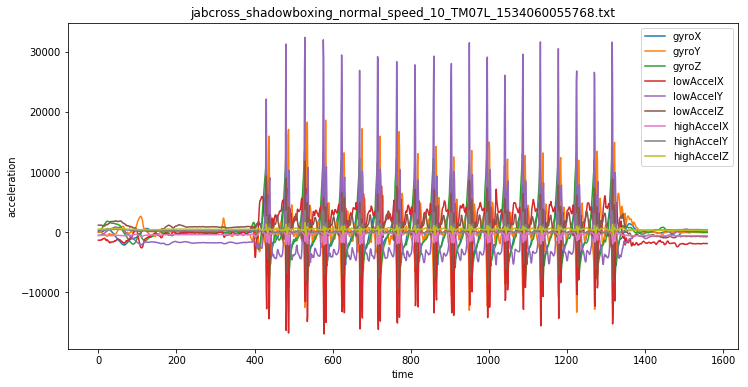

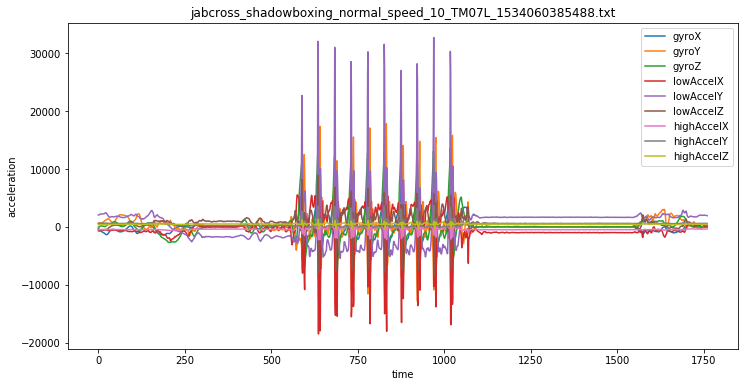

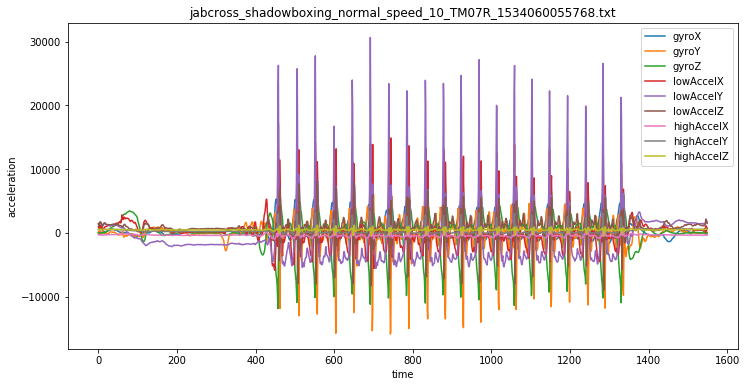

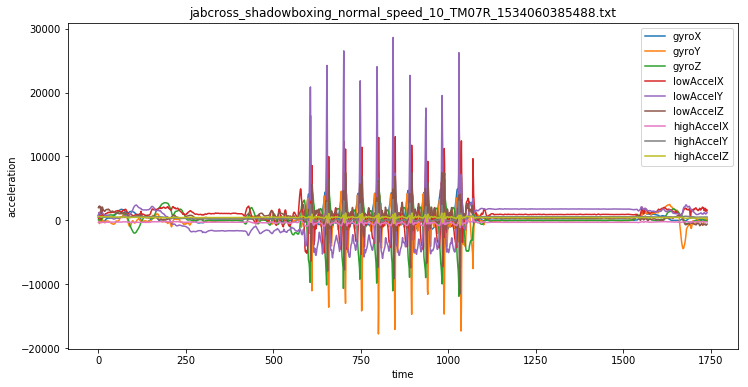

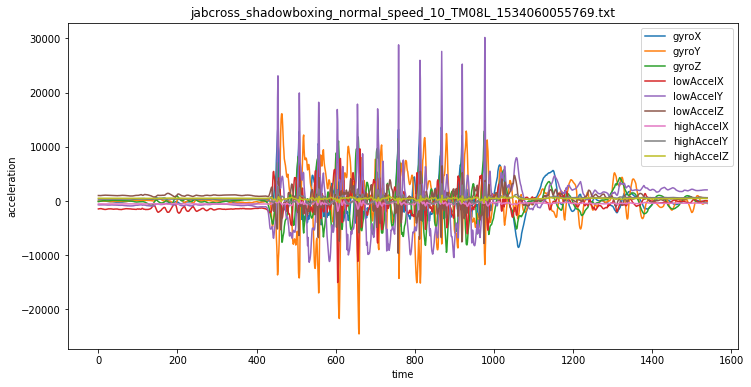

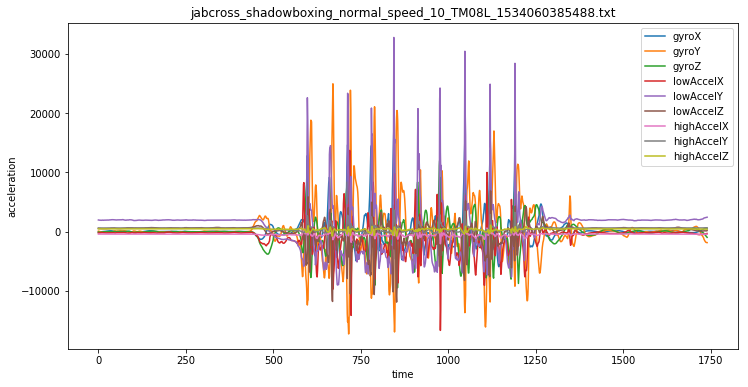

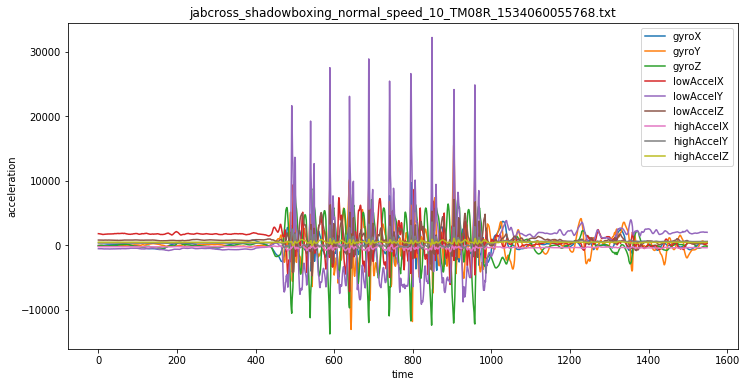

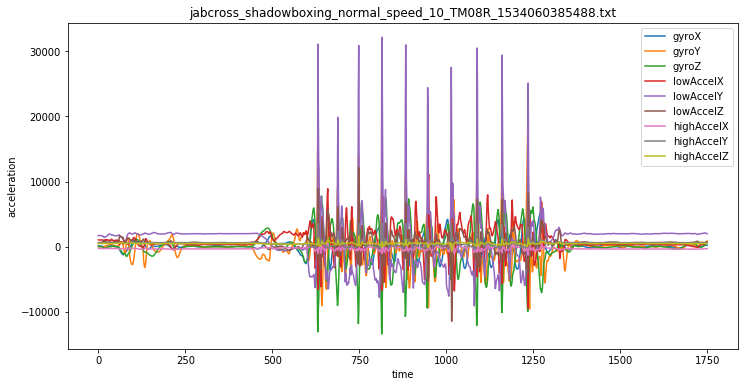

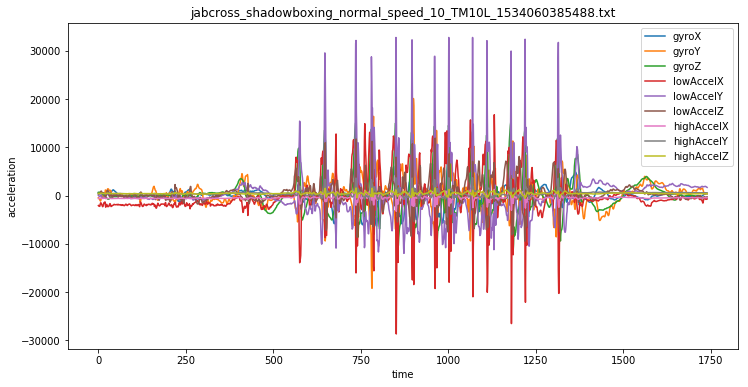

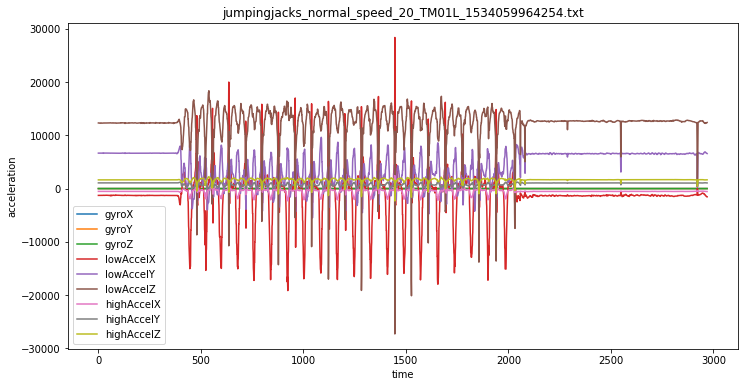

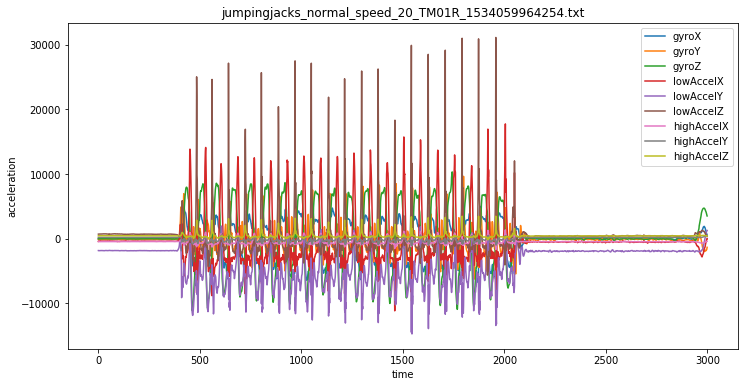

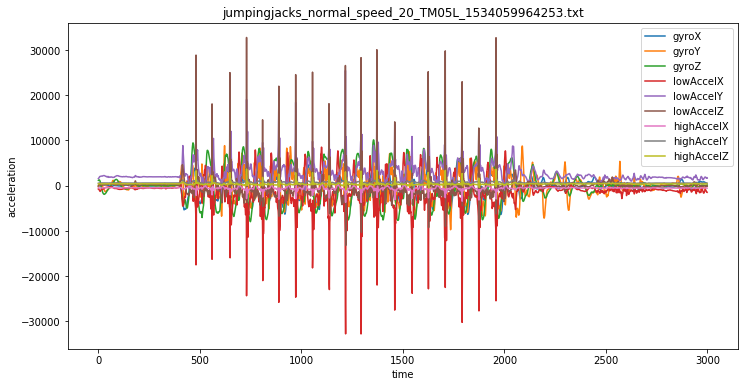

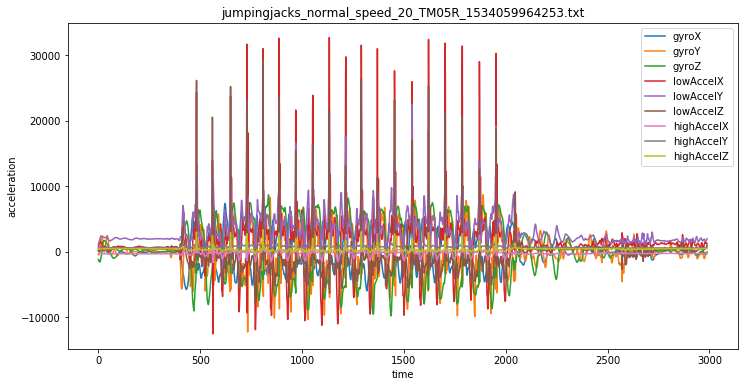

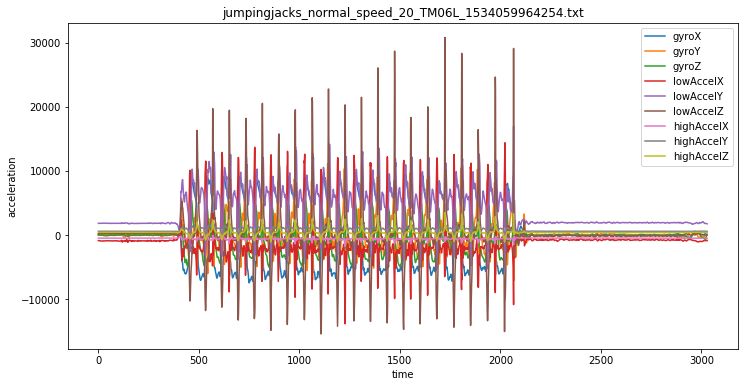

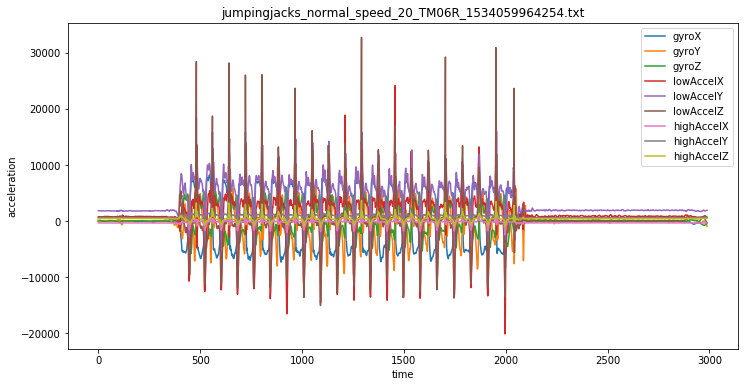

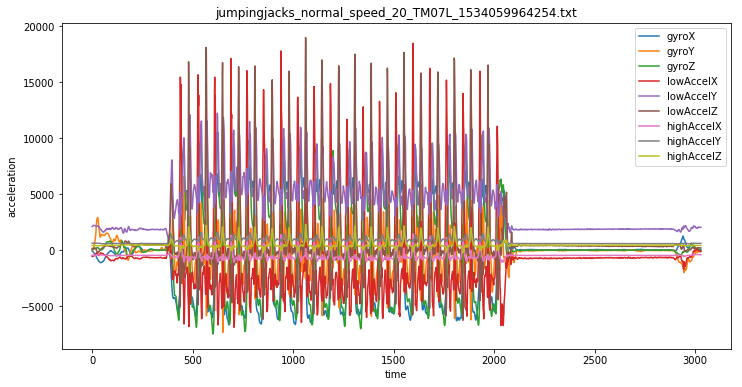

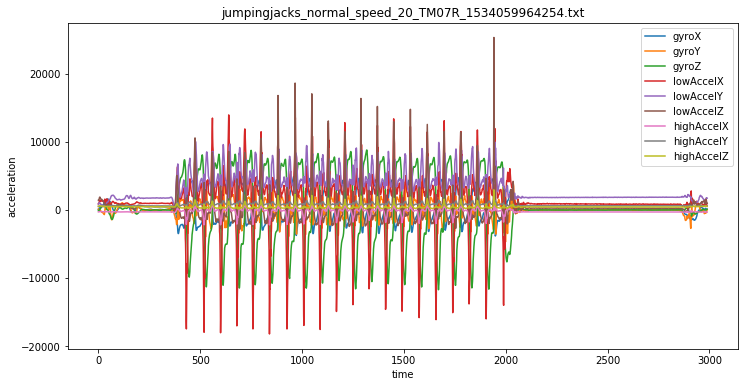

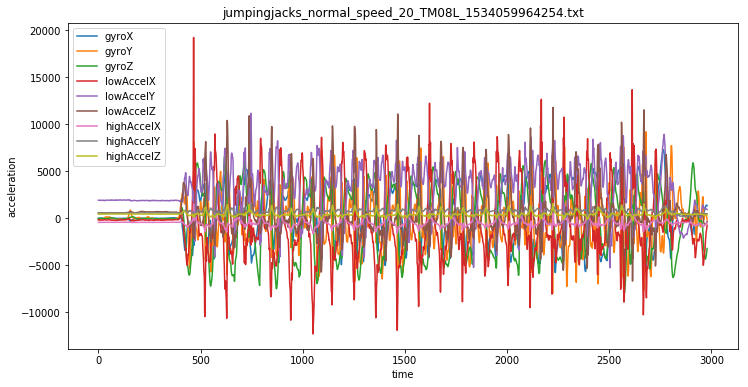

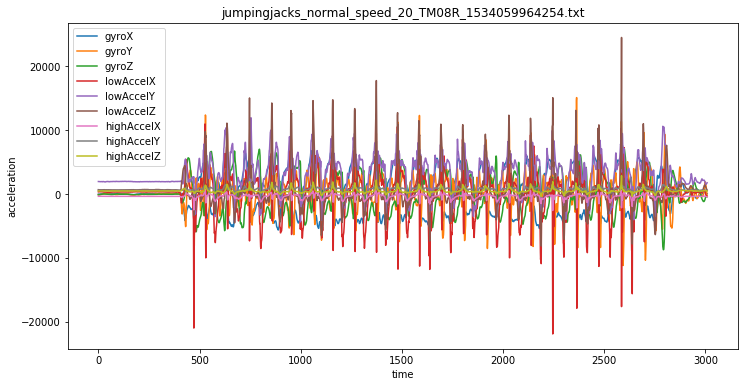

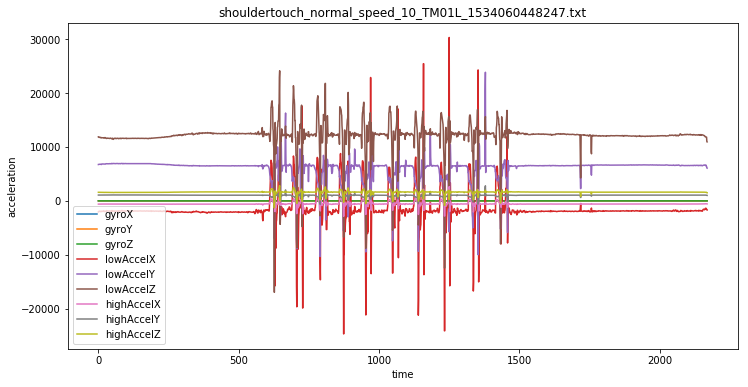

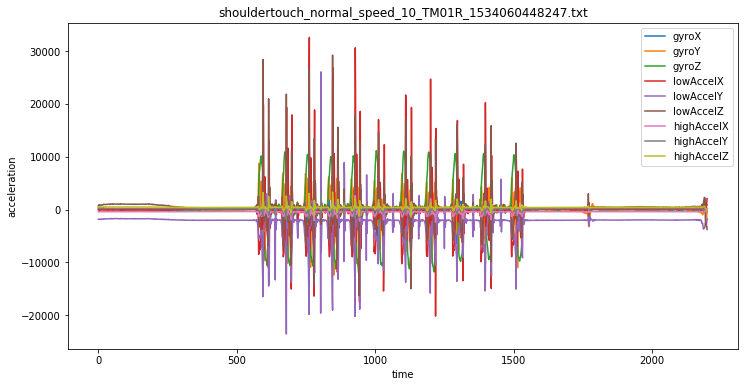

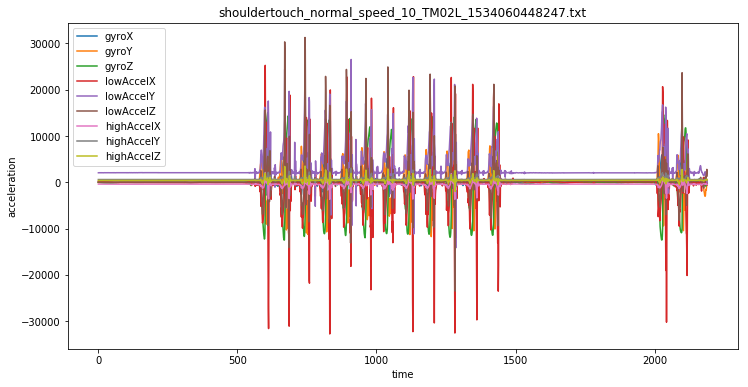

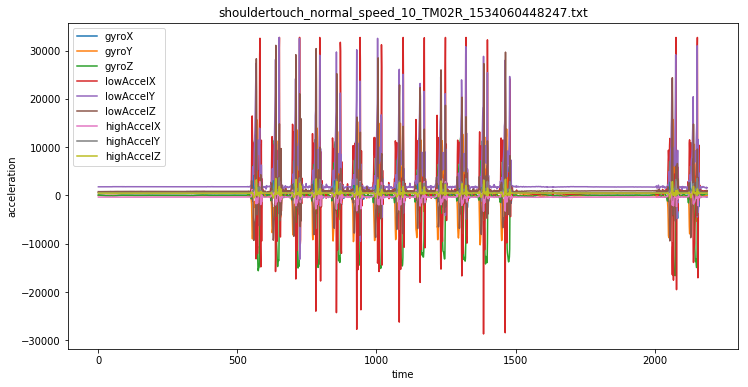

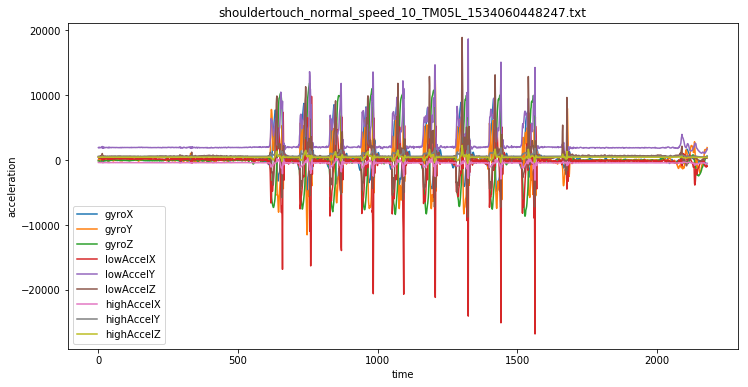

In [4]:
#Basic visualization
def pre_visualize(data,title):
    import matplotlib.pyplot as plt
    %matplotlib inline
    data.plot(figsize=(12, 6))
    plt.xlabel('time'), plt.ylabel('acceleration'),plt.title(title)
    plt.show()
for i in range(0,len(list_names)):
    pre_visualize(data2.loc[data2['exercise']==list_names[i],:],list_names[i])